In [7]:
import sys
!{sys.executable} -m pip install pandas matplotlib

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
print(pd.__version__)


2.2.3


In [18]:
import sqlite3

# 1) connect (creates file if missing)
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

conn.commit()
print("Connenct ")

Connenct 


In [20]:
# 2) create table
cur.execute("DROP TABLE IF EXISTS sales")
cur.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL,
    sale_date TEXT
)
""")
conn.commit()
print("created table ")


created table 


In [21]:
# 3) insert tiny demo data
rows = [
    ("T-Shirt", 3, 499.0, "2025-08-01"),
    ("T-Shirt", 1, 499.0, "2025-08-01"),
    ("Jeans", 2, 1499.0, "2025-08-02"),
    ("Jeans", 1, 1499.0, "2025-08-02"),
    ("Sneakers", 1, 2999.0, "2025-08-03"),
    ("Sneakers", 2, 2999.0, "2025-08-03"),
    ("Cap", 4, 199.0, "2025-08-04"),
    ("Cap", 2, 199.0, "2025-08-04"),
    ("Socks", 5, 99.0, "2025-08-05"),
    ("Socks", 10, 99.0, "2025-08-05"),
    ("Hoodie", 1, 1999.0, "2025-08-06"),
    ("Hoodie", 2, 1999.0, "2025-08-06")
]
cur.executemany(
    "INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)", rows
)
conn.commit()
print("Created sales_data.db ")


Created sales_data.db 


In [16]:
import pandas as pd

query = """
SELECT
    product,
    SUM(quantity)            AS total_qty,
    ROUND(SUM(quantity*price), 2) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
df = pd.read_sql_query(query, conn)
print(df)



    product  total_qty  revenue
0  Sneakers          3   8997.0
1    Hoodie          3   5997.0
2     Jeans          3   4497.0
3   T-Shirt          4   1996.0
4     Socks         15   1485.0
5       Cap          6   1194.0


In [17]:
# (optional) overall totals
totals = pd.read_sql_query(
    "SELECT SUM(quantity) AS all_qty, ROUND(SUM(quantity*price), 2) AS total_revenue FROM sales",
    conn
)
print("\nTotals:\n", totals)



Totals:
    all_qty  total_revenue
0       34        24166.0


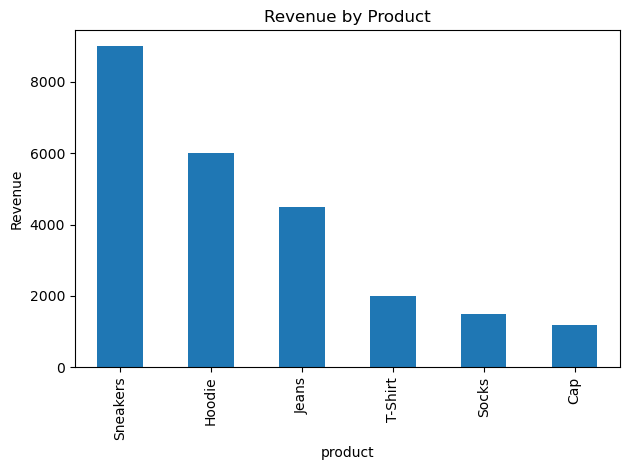

In [11]:
import matplotlib.pyplot as plt

ax = df.plot(kind="bar", x="product", y="revenue", legend=False, title="Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png", dpi=150)
plt.show()
